<a href="https://colab.research.google.com/github/macapagithub/exaple-unsupervised-learning/blob/master/models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Models

In [ ]:
pip install kneed

In [3]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
url_train_labels = 'https://raw.githubusercontent.com/macapagithub/exaple-unsupervised-learning/master/data/training_set_labels.csv'
url_test_features = 'https://raw.githubusercontent.com/macapagithub/exaple-unsupervised-learning/master/data/test_set_features.csv'
url_train_features = 'https://raw.githubusercontent.com/macapagithub/exaple-unsupervised-learning/master/data/training_set_features.csv'

In [5]:
test_features_df = pd.read_csv(url_test_features)
train_features_df = pd.read_csv(url_train_features)
train_labels_df = pd.read_csv(url_train_labels)

In [ ]:
# joined_df = train_features_df.set_index('respondent_id').join(train_labels_df.set_index('respondent_id'))
# print(joined_df.shape)
# joined_df.head(3)

In [6]:
from sklearn.cluster import KMeans
inercia = []
for i in range(1,13):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(train_labels_df)
    number_cluster.append(kmeans.inertia_)


In [ ]:
inercia

[1587428143491.6765,
 396860789864.5689,
 176385139954.87854,
 99267363077.36874,
 63506424441.20435,
 44118776807.01297,
 32415331280.35958,
 24846066081.32406,
 19628281720.940277,
 15911453190.088142,
 13137357186.444147,
 11048571829.505201]

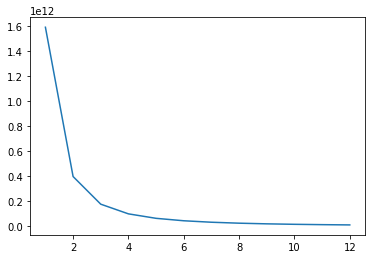

In [7]:
plt.plot(range(1,13), inercia)

In [8]:
features = []
for c in train_features_df.columns:
    t = str(train_features_df[c].dtype)
    if "int" in t or "float" in t:
        features.append(c)
features

['respondent_id',
 'h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children']

In [36]:
numeric_cols = train_features_df.columns[train_features_df.dtypes != "object"]#.values
print(numeric_cols)

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object')


In [43]:
df_feature = train_features_df[numeric_cols]
df_feature.fillna(0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [44]:
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(df_feature)
y_kmeans = kmeans.fit_predict(df_feature)
y_kmeans

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

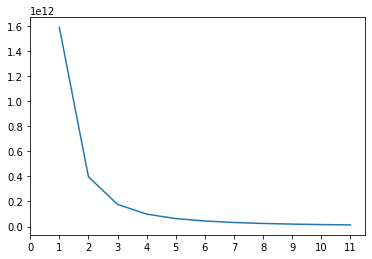

In [49]:
inercias = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 10, n_init = 10, random_state = 0)
    kmeans.fit(df_feature)
    inercias.append(kmeans.inertia_)
figure, ax = plt.subplots()
ax.plot(range(1,12), inercias)
xmin, xmax = ax.get_xlim()
custom_ticks = np.linspace(xmin, xmax, 12, dtype=int)
ax.set_xticks(custom_ticks)
ax.set_xticklabels(custom_ticks)
print()

In [50]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 12), inercias, curve="convex", direction="decreasing")
kl.elbow

3

In [52]:
(train_labels_df["h1n1_vaccine"]
     .corr(train_labels_df["seasonal_vaccine"], method="pearson")
)

0.37714265306144495

In [56]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# Proyectamos el dataset en 2 dimensiones usando t-SNE
# cdf = df_feature.drop(['diagnosis'], axis=1)
cdf = df_feature

tsne = TSNE(n_components=2, perplexity=10, random_state=1000)
data_tsne = tsne.fit_transform(cdf)

df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=cdf.index)
dff = pd.concat([df_feature, df_tsne], axis=1)

# Hacemos clustering con KMeans y K=2
km = KMeans(n_clusters=2, max_iter=1000, random_state=1000)
Y_pred = km.fit_predict(cdf)

df_km = pd.DataFrame(Y_pred, columns=['prediction'], index=cdf.index)
kmdff = pd.concat([dff, df_km], axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


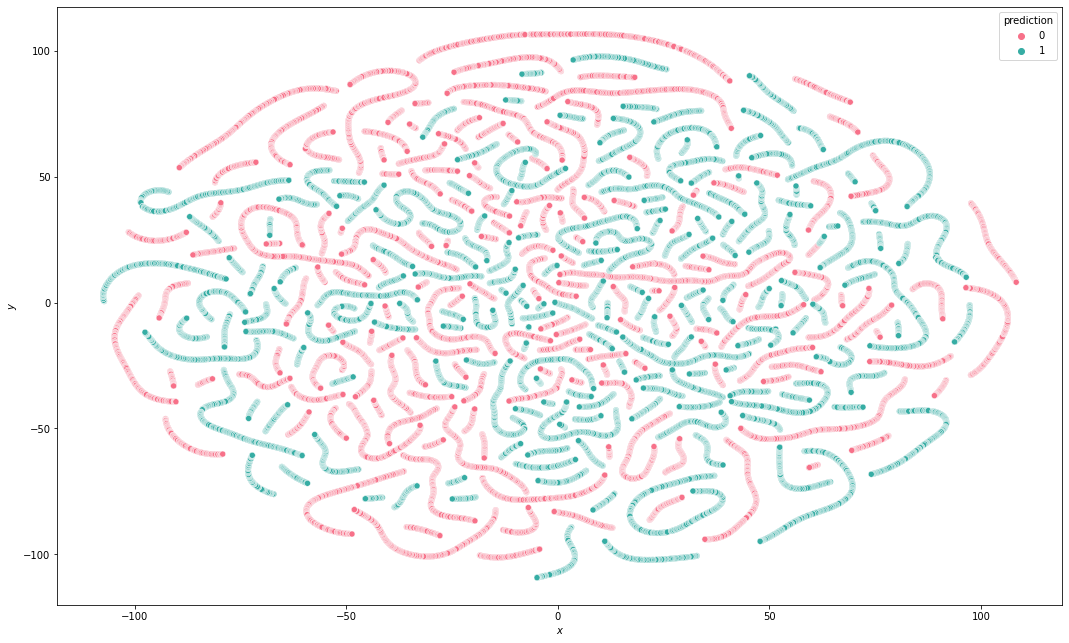

In [59]:
# Mostramos los resultados
fig, ax = plt.subplots(figsize=(18, 11))

sns.scatterplot(x='x',y='y',hue='prediction',sizes=(30, 400),
                palette=sns.color_palette("husl", 2),data=kmdff,ax=ax)

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
plt.show()

Mean shift

In [61]:
print('Hola')

Hola


DBSCAN

In [62]:
import matplotlib.cm as cm
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

In [74]:
# Proyectamos el dataset en 2 dimensiones usando t-SNE
cdf = df_feature

tsne = TSNE(n_components=2, perplexity=10, random_state=1000)
data_tsne = tsne.fit_transform(cdf)

df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=cdf.index)
dff = pd.concat([df_feature, df_tsne], axis=1)

# Hacemos clustering con DBSCAN
db = DBSCAN(eps=0.2,min_samples = 3)
Y_pred = db.fit_predict(cdf)

df_km = pd.DataFrame(Y_pred, columns=['prediction'], index=cdf.index)
kmdff = pd.concat([dff, df_km], axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


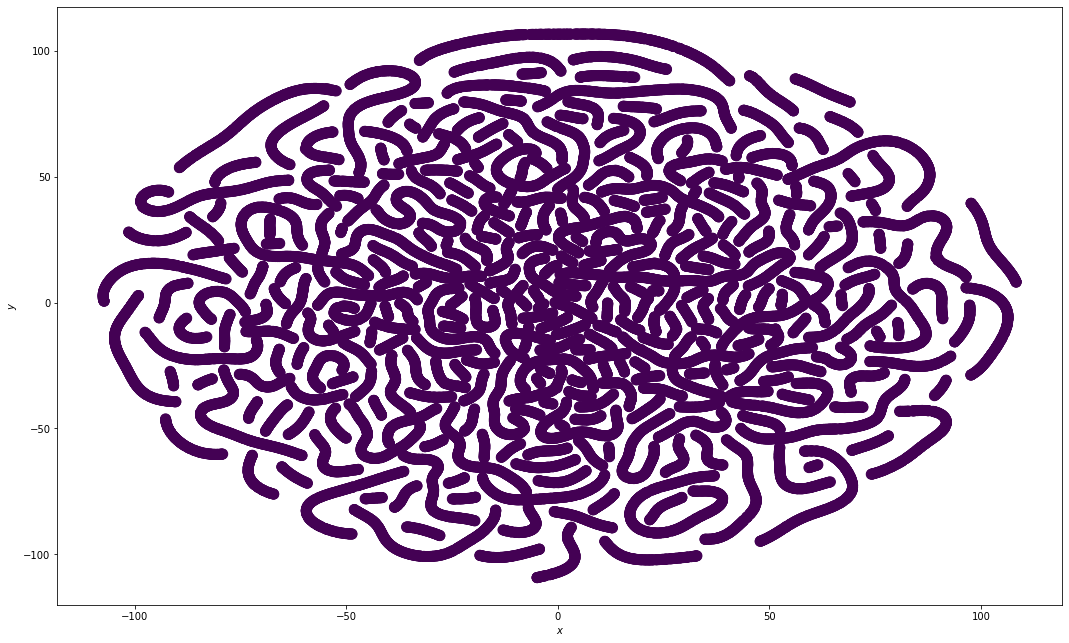

array([-1, -1, -1, ..., -1, -1, -1])

In [75]:
# Mostramos los resultados
fig, ax = plt.subplots(figsize=(18, 11))

# sns.scatterplot(x='x',y='y',hue='prediction',sizes=(30, 400),
#                palette=sns.color_palette("tab10", 1),data=kmdff,ax=ax)

plt.scatter(data_tsne[:,0],data_tsne[:,1], c=db.labels_, s=100)


ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
plt.show()
db.labels_